In [1]:
from generate_test_beam import generate_test_beam, generate_test_images

/global/homes/r/rroussel/.conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([-25.], device='cuda:0') tensor(195.8930, device='cuda:0', dtype=torch.float64)
tensor([-18.6842], device='cuda:0') tensor(118.3159, device='cuda:0', dtype=torch.float64)
tensor([-12.3684], device='cuda:0') tensor(61.2203, device='cuda:0', dtype=torch.float64)
tensor([-6.0526], device='cuda:0') tensor(23.4267, device='cuda:0', dtype=torch.float64)
tensor([0.2632], device='cuda:0') tensor(3.8036, device='cuda:0', dtype=torch.float64)
tensor([6.5789], device='cuda:0') tensor(1.2652, device='cuda:0', dtype=torch.float64)
tensor([12.8947], device='cuda:0') tensor(14.7696, device='cuda:0', dtype=torch.float64)


/global/homes/r/rroussel/.conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


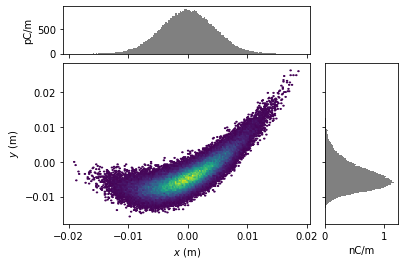

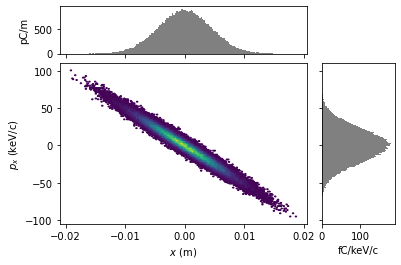

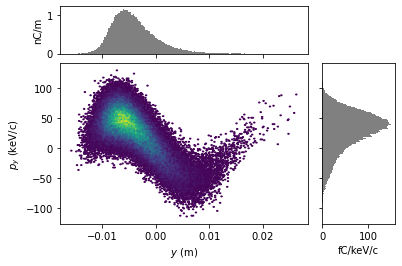

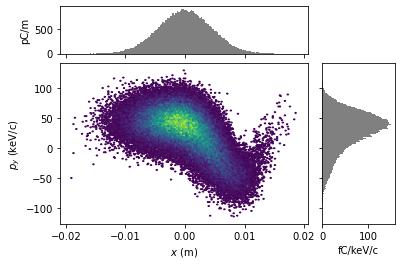

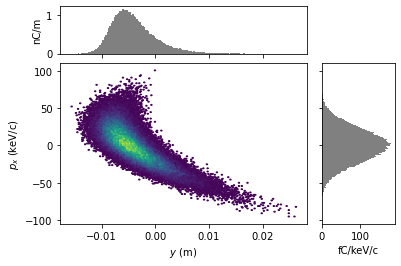

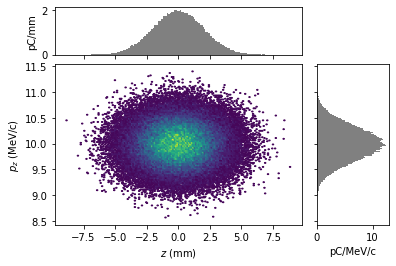

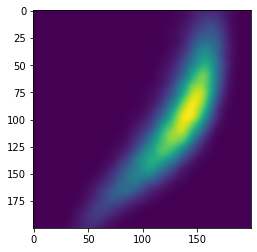

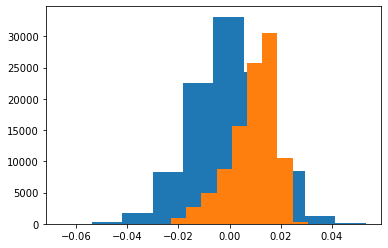

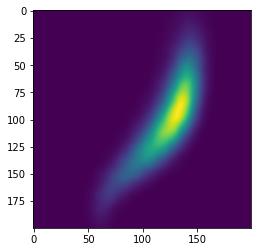

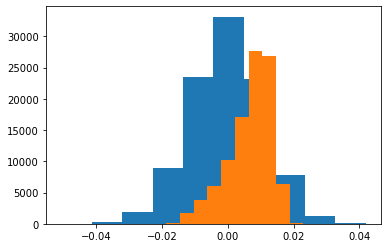

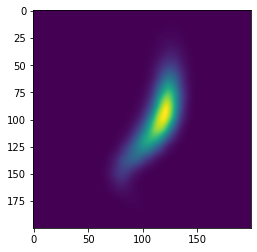

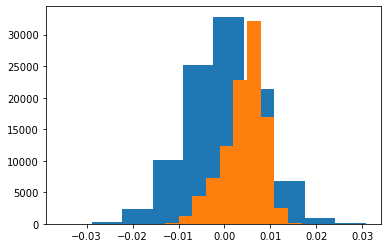

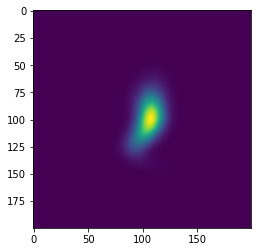

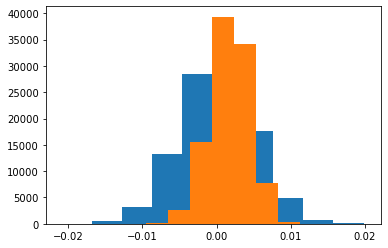

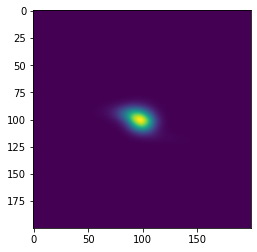

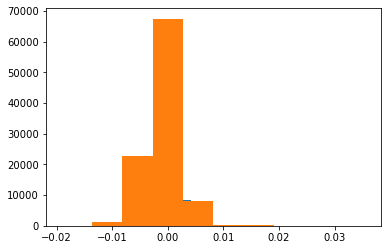

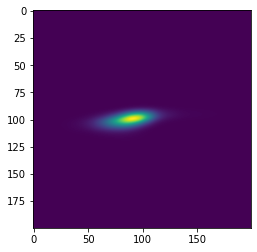

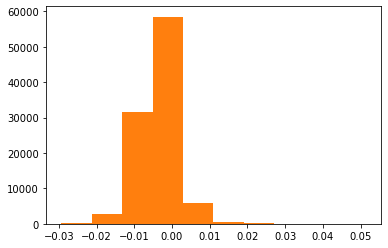

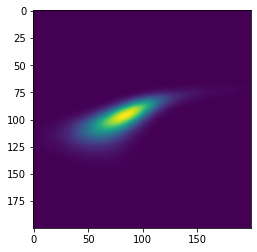

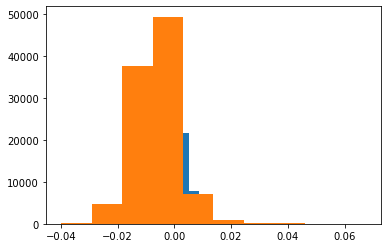

In [2]:
generate_test_images()

In [3]:
import torch
beam_coords = torch.load("ground_truth_dist.pt")
cov = torch.cov(beam_coords.T)

In [4]:
ycov = cov[2:4,2:4]
emit = torch.det(ycov).sqrt()
twiss = ycov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 9.625807983592163e-06
beta 1.8002582557274793
alpha 1.0153146972941478
gamma 1.128095887398578


In [5]:
xcov = cov[:2,:2]
emit = torch.det(xcov).sqrt()
twiss = xcov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 2.0000200007128786e-06
beta 9.9999999974357
alpha 5.000000000001452
gamma 2.60000000066817


In [6]:
beam_coords.shape

torch.Size([100000, 6])